# ***Estimación de Salario***

# **El proyecto**





## Objetivo
El objetivo del proyecto es desarrollar un modelo capaz de predecir si un postulante para determinado posición laboral, con calificaciones específicas, va a ajustar su expectativa salarial al presupuesto disponible por la empresa que está realizando la búsqueda. 

**¿Qué se busca entender?**

¿Cuál es el salario global promedio por tipo de practica?

¿Cuáles variables tienen mayor influencia?

¿Qué practicas dentro de IT son las mejor remuneradas?

¿Qué influencia tiene la región en la que se encuentran trabajando?

¿Existe diferencia respecto del tamaño de las empresas? De ser así, ¿qué peso tienen?

## Proceso llevado a cabo

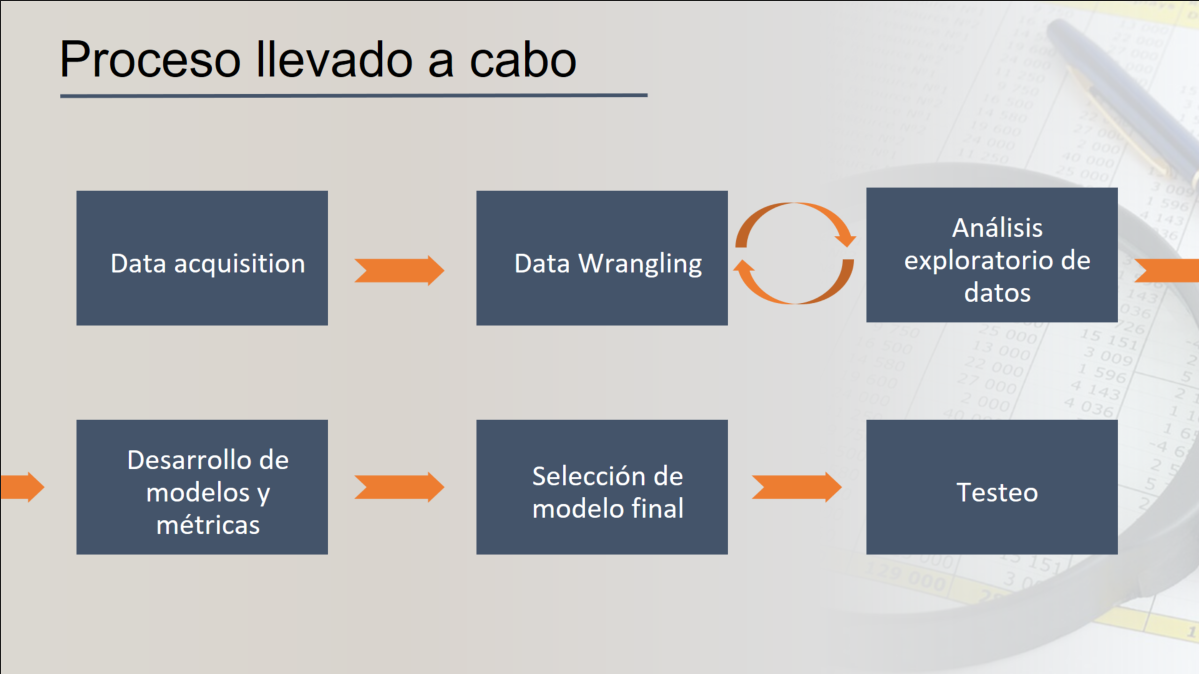

## **Equipo de trabajo**

Frada, Martín Esteban

Ramos, Ileana

# **Data Acquisition**

## **Fuente de datos**
Con la finalidad de poder responder las consultas planteadas, se trabaja con una base de datos estructurados que contiene registros salariales en un periodo de tiempo determinado, pertenecientes al sector tecnológico.

La fuente de datos utilizada recopila los salarios en el rubro de Data Science, se distinguen entre diferentes años, nivel de experiencia, tipo de empleo, cargo laboral, salario, residencia de empleado, proporcion de salario remoto, locacion de la compania y el tamano de la misma. 

La fuente de datos se extrae de este link: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

**Tipos de datos**

Estructurados: los datos se encuentran arreglados en filas y columnas con su título correspondiente

**Contenido de la tabla**

La tabla se compone de las siguientes columnas: 

*   **work_year:** The year the salary was paid

*   **experience_level:**	The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

*   **employment_type:**	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

*   **job_title:**	The role worked in during the year

*   **salary:**	The total gross salary amount paid

*   **salary_currency:**	The currency of the salary paid as an ISO 4217 currency code.

*   **salaryinusd:**	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)

*   **employee_residence:**	Employee's primary country of residence in during the work year as an ISO 3166 country code

*   **remote_ratio:**	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

*   **company_location:**	The country of the employer's main office or contracting branch as an ISO 3166 country code

*   **company_size:**	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)



**Librerías usadas**

In [ ]:
#Se importan las librerias
import pandas as pd
import numpy as np

# Data Wrangling
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf      

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.anova import anova_lm
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
encoder = LabelEncoder()
from sklearn import metrics

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

**Importar datos**

In [ ]:
#Lectura de base de datos
salarios = pd.read_csv('ds_salaries.csv')  

# **Data wrangling**

Se realiza un análisis exploratorio de datos para entender la forma de la tabla, su contenido y los tipos de datos alojados en ella. 

Se determina que la tabla contiene 12 columnas y 607 filas. No contiene objetos nulos. 

Los tipos de datos mayormente cadenas y números enteros.

Variables numéricas: salary, salaryinusd, work_year, remote_ratio

Variables categóricas: experience_level, employment_type, job_title, salary_currency, employee_residence, company_location, company_size



### **Exploración inicial de datos**

In [ ]:
#Visualización del contenido de las primeras 5 filas y sus columnas
salarios.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
#Tamaño del dataframe importado
salarios.shape

(607, 12)

In [ ]:
#Se observa tipo de variable de las columnas de la tabla
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
# Se evalua si la base de datos contiene datos duplicados. 
# Se determina que no existen duplicados
salarios.groupby(salarios.duplicated()).count()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
False,607,607,607,607,607,607,607,607,607,607,607,607


In [ ]:
#Se observan todas las columnas con que cuenta la tabla
salarios.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

**Limpieza de Base de datos**

En base a los datos adquiridos, se evaluó la cantidad de datos contenidos por año y el peso de la variable de tipo de trabajo. 

En base a los resultados obtenidos se definió trabajar: 

*   Econ la información perteneciente al año 2022 debido a que posee un 52% de los datos, quedándonos con 318 registros, y a su vez se observó que no existe una correlación entre los individuos año a año

*   con los tipos de contratación de tiempo completo, ya que predominan en un 97%

*   eliminar la columna 'Unnamed: 0' ya que no contiene datos relevantes y parece ser un indice adicional


In [ ]:
# se estima el salario promedio en dolares a nivel anual, para observar su evolución. Sin embargo no existe una columna de IDs que identifique al empleado, para evaluar su elución salarial, por lo cual el promedio de salarios a nivel anual se encuentra sesgeado por todas las variables.

In [ ]:
#Se calcula la cantidad de registros que se tienen por año. Se observa que no existe una cantidad homogeana de datos, y la mayor cantidad pertenece al año 2022.
salarios_yr_2 = salarios.groupby('work_year').count().loc[:, salarios.groupby('work_year').count().columns.intersection(['work_year','job_title'])]
salarios_yr_2 

,job_title
work_year,
2020,72
2021,217
2022,318


In [ ]:
# Se refleja la cantidad de datos por año a nivel porcentual.
salarios_yr_2['job_title']/salarios['work_year'].count()

work_year
2020    0.118616
2021    0.357496
2022    0.523888
Name: job_title, dtype: float64

In [ ]:
# Se calcula la cantidad de registros que existe por tipo de empleos. Se observa que el tipo de puesto "FULL TIME" contiene la mayor cantidad de registros.
condicion_lab = salarios.groupby('employment_type').count().loc[:, salarios.groupby('employment_type').count().columns.intersection(['employment_type','job_title'])]
condicion_lab 

,job_title
employment_type,
CT,5
FL,4
FT,588
PT,10


In [ ]:
# Se evalua el peso de la condición laboral, para confirmar lo observado.
condicion_lab['job_title']/salarios['work_year'].count()

employment_type
CT    0.008237
FL    0.006590
FT    0.968699
PT    0.016474
Name: job_title, dtype: float64

En base a lo observado en los dos análisis previos, se define filtrar los datos que no tienen peso en la base de datos que se va a utilizar como input para el modelado.

In [ ]:
#Se filtra la base de datos por año 2022
salarios = salarios[salarios['work_year']==2022].reset_index()

In [ ]:
#Se filtra la base de datos por tipo de trabajo "FT = full time"
salarios = salarios[salarios['employment_type']=="FT"].reset_index()

**Variable: Job title**

Respecto a los títulos de puestos laborales, se analizó la dispersión de la muestra respecto de cada uno, detectando que 74% de los datos se encuentran agrupados en tres puestos: Data Analyst, Data Scientist y Data Engineer. Los 78 datos restantes que conforman el 26% de la muestra, se encuentran distribuidos en 30 posiciones laborales.

En base a esto se define analizar el contenido de las posiciones y re-agrupar las que puedan ser re-agrupadas de acuerdo a sus calificaciones, generando columnas soportes para complementar dicha descripción.  Por ejemplo, “Director of Data Science” será ajustado a Posición “Data Science”, columna “Director”: “Si”.



In [ ]:
#Se evalúa la cantidad de registros que hay por puesto laboral
tipo_salario = salarios.groupby('job_title').count()
tipo_salario = tipo_salario.loc[:, tipo_salario.columns.intersection(['index','job_title'])].sort_values(by=['index'])
tipo_salario

,index
job_title,
Director of Data Science,1
Data Science Engineer,1
Head of Machine Learning,1
Lead Data Engineer,1
Lead Machine Learning Engineer,1
Data Analytics Lead,1
Principal Data Scientist,1
Data Analytics Engineer,1
Computer Vision Software Engineer,1


In [ ]:
#Evaluamos el peso de cada puesto laboral
tipo_salario['index']/salarios['work_year'].count()*100

job_title
Director of Data Science                     0.318471
Data Science Engineer                        0.318471
Head of Machine Learning                     0.318471
Lead Data Engineer                           0.318471
Lead Machine Learning Engineer               0.318471
Data Analytics Lead                          0.318471
Principal Data Scientist                     0.318471
Data Analytics Engineer                      0.318471
Computer Vision Software Engineer            0.318471
Machine Learning Infrastructure Engineer     0.318471
Applied Machine Learning Scientist           0.318471
NLP Engineer                                 0.318471
Principal Data Analyst                       0.318471
ML Engineer                                  0.318471
Financial Data Analyst                       0.318471
Machine Learning Developer                   0.636943
Head of Data Science                         0.636943
Head of Data                                 0.636943
AI Scientist      

En base al análisis realizado, se observa que 75% de los datos se encuentran concentrados en 3 tipos de posiciones. A su vez, la descripción de las posiciones restantes se encuentran sucias, heterogeneas, erroneamente nombradas. En base a esto se define limpiar la descripción del título laboral, creando una nueva columna y columnas flag que complementan y dan profundida a la descripción de cada puesto nuevo creado.

In [ ]:
# Creación de flags complementarias
salarios["Flag Manager"]=0
salarios.loc[salarios["job_title"].str.contains("Manager"), "Flag Manager"] = 1
salarios["Flag Director"]=0
salarios.loc[salarios["job_title"].str.contains("Director"), "Flag Director"] = 1
salarios["Flag Lead"]=0
salarios.loc[salarios["job_title"].str.contains("Lead"), "Flag Lead"] = 1
salarios["Flag Engineer"]=0
salarios.loc[salarios["job_title"].str.contains("Engineer"), "Flag Engineer"] = 1
salarios["Flag Principal"]=0
salarios.loc[salarios["job_title"].str.contains("Principal"), "Flag Principal"] = 1
salarios["Flag Software Engineer"]=0
salarios.loc[salarios["job_title"].str.contains("Software Engineer"), "Flag Software Engineer"] = 1
salarios["Flag Infrastructure Engineer"]=0
salarios.loc[salarios["job_title"].str.contains("Infrastructure Engineer"), "Flag Infrastructure Engineer"] = 1
salarios["Flag Applied Scientist"]=0
salarios.loc[(salarios["job_title"].str.contains("Applied")) & (salarios["job_title"].str.contains("Scientist")), "Flag Applied Scientist"] = 1
salarios["Flag Developer"]=0
salarios.loc[salarios["job_title"].str.contains("Developer"), "Flag Developer"] = 1
salarios["Flag Head"]=0
salarios.loc[salarios["job_title"].str.contains("Head"), "Flag Head"] = 1
salarios["Flag Scientist"]=0
salarios.loc[salarios["job_title"].str.contains("Scientist"), "Flag Scientist"] = 1
salarios["Flag Analyst"]=0
salarios.loc[salarios["job_title"].str.contains("Analyst"), "Flag Analyst"] = 1

In [ ]:
# Se unifica las posiciones laborales bajo un título más amplio.
salarios.loc[(salarios["job_title"].str.contains("Data")) & (salarios["job_title"].str.contains("Scientist")), "New Job Title"] = "Data Science"
salarios.loc[(salarios["job_title"].str.contains("Data")) & (salarios["job_title"].str.contains("Analytics")), "New Job Title"] = "Data Analytics"
salarios.loc[(salarios["job_title"].str.contains("Data")) & (salarios["job_title"].str.contains("Science")), "New Job Title"] = "Data Science"
salarios.loc[(salarios["job_title"].str.contains("Machine")) & (salarios["job_title"].str.contains("Learning")), "New Job Title"] = "Machine Learning"
salarios.loc[(salarios["job_title"].str.contains("Lead")) & (salarios["job_title"].str.contains("Data")) & (salarios["job_title"].str.contains("Engineer")), "New Job Title"] = "Data Science"
salarios.loc[(salarios["job_title"].str.contains("Computer")) & (salarios["job_title"].str.contains("Vision")) & (salarios["job_title"].str.contains("Engineer")), "New Job Title"] = "Computer Vision Engineer"
salarios.loc[(salarios["job_title"].str.contains("NLP")), "New Job Title"] = "NLP"
salarios.loc[(salarios["job_title"].str.contains("Data")) & (salarios["job_title"].str.contains("Analyst")), "New Job Title"] = "Data Analytics"
salarios.loc[(salarios["job_title"].str.contains("ML")), "New Job Title"] = "Machine Learning"
salarios.loc[(salarios["job_title"].str.contains("Head")) & (salarios["job_title"].str.contains("Data")), "New Job Title"] = "Data Science"
salarios.loc[(salarios["job_title"].str.contains("AI")) & (salarios["job_title"].str.contains("Scientist")), "New Job Title"] = "AI Science"
salarios.loc[(salarios["job_title"].str.contains("Data")) & (salarios["job_title"].str.contains("Scientist")), "New Job Title"] = "Data Science"
salarios.loc[(salarios["job_title"].str.contains("Analytics")) & (salarios["job_title"].str.contains("Engineer")), "New Job Title"] = "Data Analytics"
salarios.loc[(salarios["job_title"].str.contains("Data")) & (salarios["job_title"].str.contains("Engineer")), "New Job Title"] = "Data Science"
salarios.loc[(salarios["job_title"].str.contains("Data")) & (salarios["job_title"].str.contains("Architect")), "New Job Title"] = "Data Architect"
salarios.loc[(salarios["job_title"].str.contains("ETL")) & (salarios["job_title"].str.contains("Developer")), "New Job Title"] = "ETL Developer"
salarios.loc[(salarios["job_title"].str.contains("Research")) & (salarios["job_title"].str.contains("Scientist")), "New Job Title"] = "Research Scientist"

In [ ]:
#Nueva clasificación de titulo de trabajo realizada
nuevo_tipo_salario = salarios.groupby('New Job Title').count()
nuevo_tipo_salario = nuevo_tipo_salario.loc[:, nuevo_tipo_salario.columns.intersection(['index','New Job Title'])].sort_values(by=['index'])
nuevo_tipo_salario

,index
New Job Title,
NLP,1
AI Science,2
ETL Developer,2
Computer Vision Engineer,3
Research Scientist,4
Data Architect,8
Machine Learning,28
Data Analytics,86
Data Science,180


**Variables: Employee residence, company location**

Se analizan los países y la cantidad de datos pertenecientes a cada grupo, para entender la muestra de cada uno y el efecto que pueden llegar a tener en el entrenamiento del modelo.

Se realizó el mismo análisis de dispersión de muestra en las variables employee_residence y company_location, ambas contienen información de países de origen, en el primero caso de residencia de los empleados y en el segundo de residencia de las empresas.


*   En el caso de employee_residence, el 70% de los datos pertenecía a Estados Unidos, el 30% restante representa 94 datos repartidos entre 23 países.
*   En el caso de company_location, el 72% de los datos pertenecía a Estados Unidos, el 28% restante representa 89 datos repartidos entre 20 países.

Posterior al análisis se definió reemplazar los países por la región geográfica en la que se encuentran.


In [ ]:
#Se evalúa la cantidad de registros que hay por residencia de empleado
residencia_empleado = salarios.groupby('employee_residence').count()
residencia_empleado = residencia_empleado.loc[:, residencia_empleado.columns.intersection(['index','employee_residence'])].sort_values(by=['index'])
residencia_empleado 

,index
employee_residence,
AR,1
AT,1
BO,1
BR,1
PL,1
CH,1
EE,1
RU,1
NL,1


In [ ]:
#se decide crear categoría de regiones para unificar paises de residencia de empleados
salarios.loc[(salarios["employee_residence"].str.contains("AR")), "Employee_region"] = "Latam"
salarios.loc[(salarios["employee_residence"].str.contains("AT")), "Employee_region"] = "Central_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("BO")), "Employee_region"] = "Latam"
salarios.loc[(salarios["employee_residence"].str.contains("BR")), "Employee_region"] = "Latam"
salarios.loc[(salarios["employee_residence"].str.contains("PL")), "Employee_region"] = "Eastern_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("CH")), "Employee_region"] = "Central_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("EE")), "Employee_region"] = "Eastern_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("RU")), "Employee_region"] = "Eastern_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("NL")), "Employee_region"] = "Western_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("MY")), "Employee_region"] = "Asia"
salarios.loc[(salarios["employee_residence"].str.contains("IE")), "Employee_region"] = "Western_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("JP")), "Employee_region"] = "Asia"
salarios.loc[(salarios["employee_residence"].str.contains("AE")), "Employee_region"] = "Asia"
salarios.loc[(salarios["employee_residence"].str.contains("DE")), "Employee_region"] = "Central_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("PK")), "Employee_region"] = "Asia"
salarios.loc[(salarios["employee_residence"].str.contains("PT")), "Employee_region"] = "Western_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("FR")), "Employee_region"] = "Western_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("AU")), "Employee_region"] = "Oceania"
salarios.loc[(salarios["employee_residence"].str.contains("IN")), "Employee_region"] = "Asia"
salarios.loc[(salarios["employee_residence"].str.contains("ES")), "Employee_region"] = "Western_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("GR")), "Employee_region"] = "Eastern_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("CA")), "Employee_region"] = "North_America"
salarios.loc[(salarios["employee_residence"].str.contains("GB")), "Employee_region"] = "Western_Europe"
salarios.loc[(salarios["employee_residence"].str.contains("US")), "Employee_region"] = "North_America"

In [ ]:
nuevo_Employee_region = salarios.groupby('Employee_region').count()
nuevo_Employee_region = nuevo_Employee_region.loc[:, nuevo_Employee_region.columns.intersection(['index','Employee_region'])].sort_values(by=['index'])
nuevo_Employee_region

,index
Employee_region,
Latam,3
Oceania,3
Central_Europe,4
Asia,11
Eastern_Europe,12
Western_Europe,43
North_America,238


In [ ]:
#Se evalúa la cantidad de registros que hay por locación de las empresas
company_location = salarios.groupby('company_location').count()
company_location = company_location.loc[:, company_location.columns.intersection(['index','company_location'])].sort_values(by=['index'])
company_location 

,index
company_location,
NL,1
AT,1
MX,1
PL,1
CH,1
LU,1
EE,1
IE,1
MY,1


In [ ]:
#se decide crear categoría de regiones para unificar paises de residencia de empleados
salarios.loc[(salarios["company_location"].str.contains("AR")), "Company_region"] = "Latam"
salarios.loc[(salarios["company_location"].str.contains("AT")), "Company_region"] = "Central_Europe"
salarios.loc[(salarios["company_location"].str.contains("BO")), "Company_region"] = "Latam"
salarios.loc[(salarios["company_location"].str.contains("BR")), "Company_region"] = "Latam"
salarios.loc[(salarios["company_location"].str.contains("PL")), "Company_region"] = "Eastern_Europe"
salarios.loc[(salarios["company_location"].str.contains("CH")), "Company_region"] = "Central_Europe"
salarios.loc[(salarios["company_location"].str.contains("EE")), "Company_region"] = "Eastern_Europe"
salarios.loc[(salarios["company_location"].str.contains("RU")), "Company_region"] = "Eastern_Europe"
salarios.loc[(salarios["company_location"].str.contains("NL")), "Company_region"] = "Western_Europe"
salarios.loc[(salarios["company_location"].str.contains("MY")), "Company_region"] = "Asia"
salarios.loc[(salarios["company_location"].str.contains("IE")), "Company_region"] = "Western_Europe"
salarios.loc[(salarios["company_location"].str.contains("JP")), "Company_region"] = "Asia"
salarios.loc[(salarios["company_location"].str.contains("AE")), "Company_region"] = "Asia"
salarios.loc[(salarios["company_location"].str.contains("DE")), "Company_region"] = "Central_Europe"
salarios.loc[(salarios["company_location"].str.contains("PK")), "Company_region"] = "Asia"
salarios.loc[(salarios["company_location"].str.contains("PT")), "Company_region"] = "Western_Europe"
salarios.loc[(salarios["company_location"].str.contains("FR")), "Company_region"] = "Western_Europe"
salarios.loc[(salarios["company_location"].str.contains("AU")), "Company_region"] = "Oceania"
salarios.loc[(salarios["company_location"].str.contains("IN")), "Company_region"] = "Asia"
salarios.loc[(salarios["company_location"].str.contains("ES")), "Company_region"] = "Western_Europe"
salarios.loc[(salarios["company_location"].str.contains("GR")), "Company_region"] = "Eastern_Europe"
salarios.loc[(salarios["company_location"].str.contains("CA")), "Company_region"] = "North_America"
salarios.loc[(salarios["company_location"].str.contains("GB")), "Company_region"] = "Western_Europe"
salarios.loc[(salarios["company_location"].str.contains("US")), "Company_region"] = "North_America"
salarios.loc[(salarios["company_location"].str.contains("LU")), "Company_region"] = "Western_Europe"
salarios.loc[(salarios["company_location"].str.contains("MX")), "Company_region"] = "North_America"

In [ ]:
nuevo_company_region = salarios.groupby('Company_region').count()
nuevo_company_region = nuevo_company_region.loc[:, nuevo_company_region.columns.intersection(['index','Company_region'])].sort_values(by=['index'])
nuevo_company_region

,index
Company_region,
Oceania,3
Central_Europe,6
Asia,8
Eastern_Europe,11
Western_Europe,42
North_America,244


In [ ]:
# Se realiza limpieza de las columnas que no se van a utilizar en el modelado
salarios = salarios.drop(['level_0','index', 'employment_type','Unnamed: 0','work_year','salary_currency','salary','job_title'], axis = 1)

In [ ]:
outliers = salarios.quantile(.97)

salarios = salarios[(salarios['salary_in_usd']<outliers['salary_in_usd'])]

### **Análisis univariados, bivariados y multivariados**

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip #Se instala del package manager para generar el profile reports de pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.0 MB 1.4 MB/s 
     |████████████████████████████████| 102 kB 16.5 MB/s 
     |████████████████████████████████| 690 kB 51.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 9.8 MB 15.4 MB/s 
     |████████████████████████████████| 4.7 MB 27.8 MB/s 
     |████████████████████████████████| 296 kB 98.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315269 sha256=f80ae7cb3cfbdd05f52aa8d286360ca61669ed78161dcf60296666b734944618
  Stored in directory: /tmp/pip-ephem-wheel-cache-9yj5r4f8/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=fde5d660d06c12baefcf94eaed9b532141829dfe0df98be36df8bbbfc483dee8
  Stored in directory: /root/.cache/pip/whe

In [ ]:
from pandas_profiling import ProfileReport #Se importa la libreria ProfileReport de pandas_profiling

In [ ]:
profile = ProfileReport(salarios, title='Salarios', html={'style':{'full_width':True}}) #Se genera la variable profile utilizando la fincion ProfileReport

In [ ]:
#Genera automaticamente un reporte de datos estandarizado de analisis univariado y multivariado en el cual se muestran:
#Tipo de variables, sus caracteristicas. Estadistica de quantiles. Estadistica descriptiva. Frecuencia y valores extremos. Histogramas. Correlaciones. Missing values.
#Filas duplicadas. Analisis de texto.

profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 14.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=9eb040e22ad4d208317bb57a5e6fa4bbf85939a7fff4b75ffc5d9a298011baa5
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pycountry
from geopy.geocoders import Nominatim
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats

**Promedio salarial por pais**

En el siguiente gráfico se puede observar la distribución salarial promedio por país, respecto de la ubicación geográfica de los empleados. 

In [ ]:
app = Nominatim(user_agent="tutorial")
countries = pd.DataFrame([(country.name, country.alpha_2, country.alpha_3) for country in list(pycountry.countries)], columns=["country_name", "abb1", "abb2"])

In [ ]:
salary_by_country = salarios.groupby("employee_residence").agg(
                        mean_salary=("salary_in_usd","mean"),
                        n_employees=("salary_in_usd", "count"))

salary_by_country = countries.merge(salary_by_country, left_on="abb1", right_index=True, how="right")

In [ ]:
fig = go.Figure(
    go.Choropleth(
        locations=salary_by_country["abb2"],
        z = salary_by_country["mean_salary"],
        text = salary_by_country["country_name"],
        colorbar_title="Thousands of USD",
        colorbar_tickprefix = '$',
    )
)

fig.update_layout(
    title_text='Per Country Average Salary',
    margin=dict(
        l=10,
        t=30,
        b=0,
        r=0,
        pad=0
    ))

**¿Cuál es el salario global promedio?**

El promedio salarial global de la base de datos es de USD 120.029, con un piso mínimo de USD 10.000 y un máximo de USD 224.000.
Estos datos no se encuentran segmentados por las variables de posición laboral, residencia de empleados y origen de las empresas, como así tampoco por el tamaño de estas últimas o la experiencia laboral de los empleados.


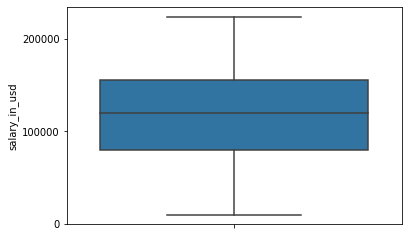

In [ ]:
#Se observa boxplot de salarios en dolares segun puestos laborales. 
import matplotlib.pyplot as plt

plt.figure()
sns.boxplot(y = 'salary_in_usd', data = salarios)
plt.rcParams.update({'font.size': 32})
plt.savefig('boxplot salario promedio.png')
plt.show()

**¿Qué prácticas dentro de IT son las mejor remuneradas?**

En base a los datos obtenidos se realizó un gráfico de bigotes abierto por puesto laboral, que permite evidenciar el promedio salarial de cada uno, como así también detectar los cuartiles y salarios outliers:
-	Las posiciones de Data Architect son las que cuentan con un mayor promedio salarial 
-	Data Analytics y Machine Learning cuentan con el promedio salarial mas bajo de la muestra


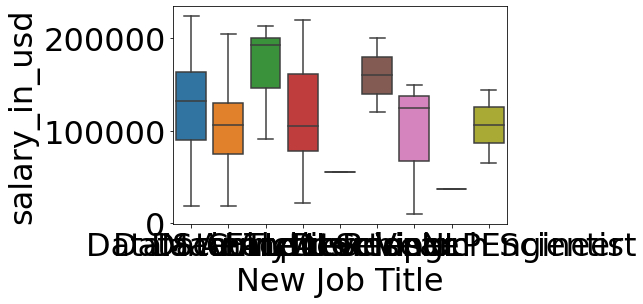

In [ ]:
#Se observa boxplot de salarios en dolares segun puestos laborales. 
import matplotlib.pyplot as plt

plt.figure()
sns.boxplot(y = 'salary_in_usd', x = 'New Job Title', data = salarios)
plt.rcParams.update({'font.size': 32})
plt.savefig('boxplot salarios.png')
plt.show()

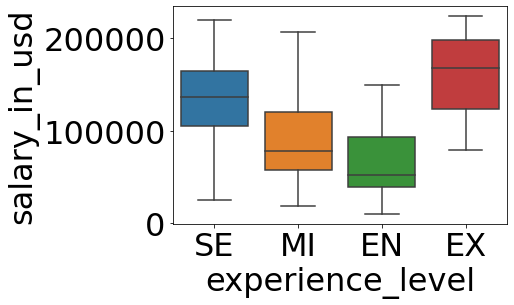

In [ ]:
#Se observa boxplot de salarios en dolares segun experience level. Compara para cada una las medianas, cuartiles y outliers de la muestra, EX es la experience_level mayor con mayores outliers 
plt.figure()
sns.boxplot(y = 'salary_in_usd', x = 'experience_level', data = salarios)
plt.show()

**¿Existe diferencia respecto del tamaño de las empresas? De ser así, ¿qué peso tienen?**

Con respecto al tamaño de las empresas de la muestra, definitivamente existe un disparidad entre el sueldo promedio percibido por sus empleados. Principalmente la diferencia se da entre las empresas chicas (“S”) en comparación con las medianas (“M”) y grandes (“L”).

Cabe mencionar que la muestra se encuentra sesgada respecto de la cantidad de elementos pertenecientes a cada sub-segmento: M: 82% de los datos, L: 14% de los datos, S: 4% de los datos.


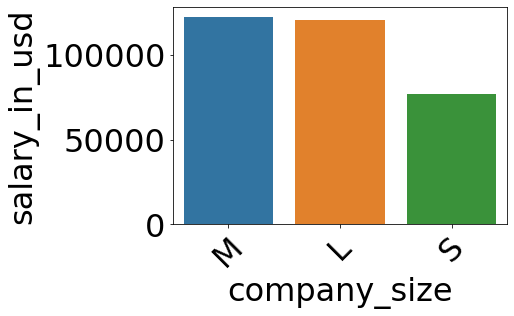

In [ ]:
#Se compara en grafico de barras el promedio salarial segun tamano de la firma, las empresas grandes y medianas tienen en promedio similar salarios
title = salarios[["company_size", "salary_in_usd"]].groupby(['company_size'], as_index=False).mean().sort_values(by='salary_in_usd', ascending=False)

plt.figure()

sns.barplot(x='company_size', y='salary_in_usd', data=title)
plt.xticks(rotation=45)
plt.show()

**Arbol de roles laborales segmentados por:'Company_region','experience_level'**

In [ ]:
#Se genera una tabla teniendo en cuenta el promedio salarial para las diferentes variables
agrupacion_salarios = salarios.groupby(['New Job Title','experience_level','Company_region', 'company_size'], as_index=False).mean('salary_in_usd').drop(['remote_ratio'],axis= 'columns')
agrupacion_salarios

,New Job Title,experience_level,Company_region,company_size,salary_in_usd,Flag Manager,Flag Director,Flag Lead,Flag Engineer,Flag Principal,Flag Software Engineer,Flag Infrastructure Engineer,Flag Applied Scientist,Flag Developer,Flag Head,Flag Scientist,Flag Analyst
0,AI Science,MI,North_America,L,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,AI Science,MI,North_America,M,120000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Computer Vision Engineer,EN,North_America,M,125000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Computer Vision Engineer,EN,Oceania,S,150000.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Computer Vision Engineer,EN,Western_Europe,M,10000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NLP,MI,North_America,L,37236.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,Research Scientist,EN,North_America,L,120000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58,Research Scientist,MI,Central_Europe,L,64849.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59,Research Scientist,SE,North_America,L,144000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
import plotly.express as px
fig=px.treemap(salarios,path=[px.Constant('Job Roles'),'New Job Title','Company_region','experience_level'],template='ggplot2',hover_name='New Job Title',title='<b>TreeMap of Different Roles in Data Science with Experience Level')
fig.update_traces(root_color='lightgrey')

In [ ]:
#Se genera una tabla en donde se listan el tipo de cargo que ocupa el empleado segun el experience_level
salarios_exp = pd.pivot_table(agrupacion_salarios.reset_index(), index=['New Job Title'], columns='experience_level', values='salary_in_usd', aggfunc='mean', fill_value=0).reset_index()
salarios_exp

experience_level,New Job Title,EN,EX,MI,SE
0,AI Science,0.00,0.00,160000.000000,0.000000
1,Computer Vision Engineer,95000.00,0.00,0.000000,0.000000
2,Data Analytics,79750.00,137500.00,52236.619048,116574.017857
3,Data Architect,0.00,0.00,0.000000,170030.428571
4,Data Science,61304.25,172378.25,77144.324152,140318.024802
5,ETL Developer,0.00,0.00,54957.000000,0.000000
6,Machine Learning,29641.50,79039.00,99502.809524,97009.466667
7,NLP,0.00,0.00,37236.000000,0.000000
8,Research Scientist,120000.00,0.00,64849.000000,118713.500000


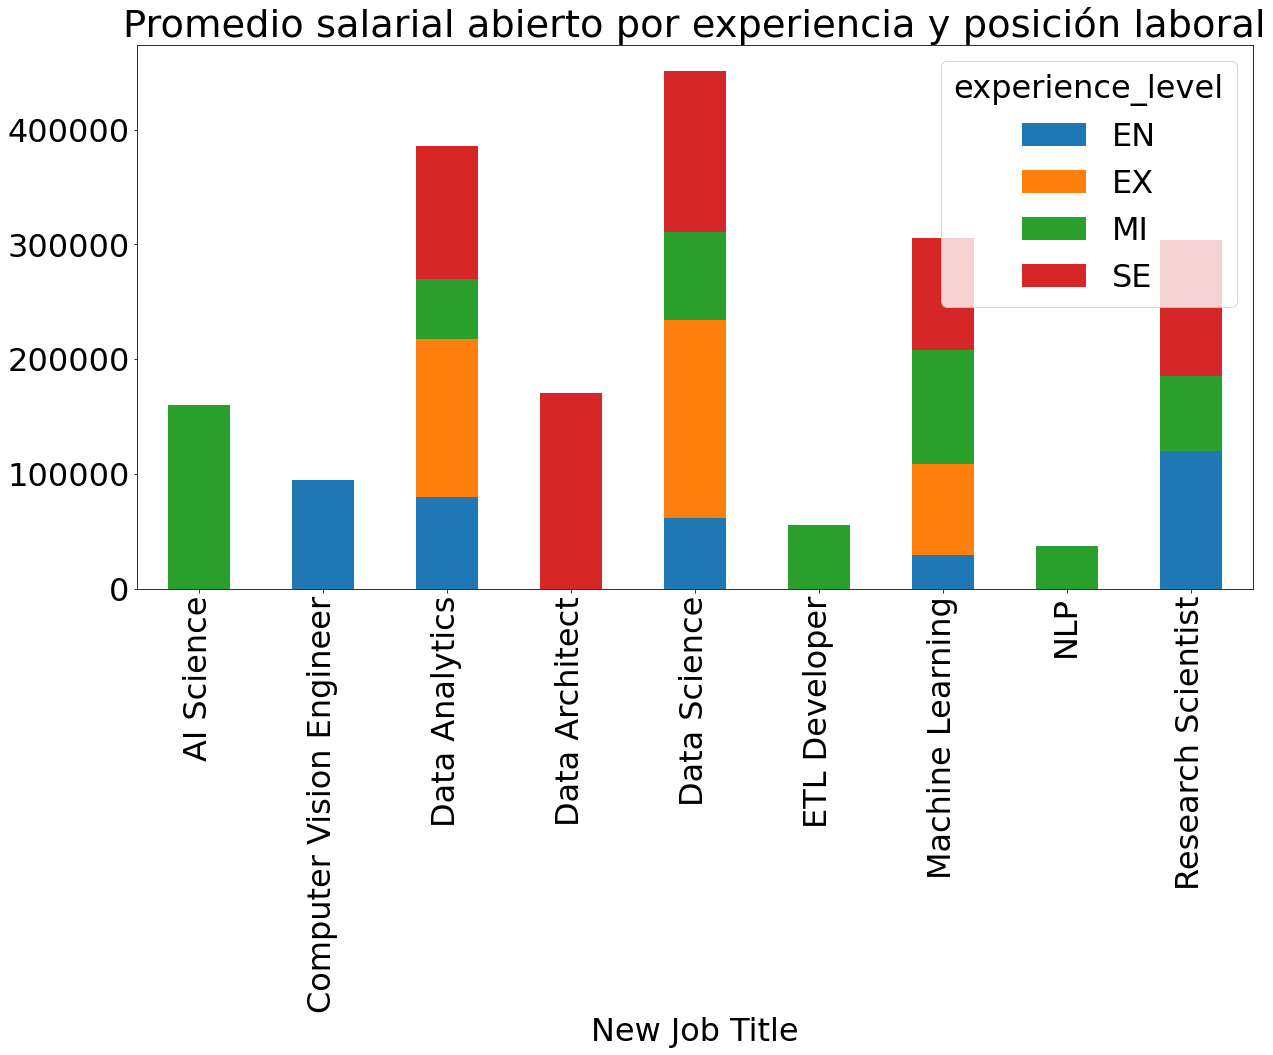

In [ ]:
#gráfico de barras apiladas de experience_level que muestra el promedio salarial (en el eje y) segun el job_title (eje x), 

plt.rcParams["figure.figsize"] = (20,10)
salarios_exp.plot.bar(stacked=True, x='New Job Title', title='Promedio salarial abierto por experiencia y posición laboral');


In [ ]:
#Se genera una tabla en donde se listan la company_region segun el experience_level
salarios_exp = pd.pivot_table(agrupacion_salarios.reset_index(), index=['Company_region'], columns='experience_level', values='salary_in_usd', aggfunc='mean', fill_value=0).reset_index()
salarios_exp

experience_level,Company_region,EN,EX,MI,SE
0,Asia,29610.500000,79039.0000,25028.500000,92500.000000
1,Central_Europe,58035.000000,0.0000,91709.000000,125303.000000
2,Eastern_Europe,0.000000,0.0000,42010.250000,0.000000
3,North_America,91699.428571,163658.6875,105968.106209,151351.521495
4,Oceania,118351.500000,0.0000,87425.000000,0.000000
5,Western_Europe,29573.500000,0.0000,74307.285714,79783.937500


In [ ]:
#Se genera tabla pivot en donde se listan los promedios salariales de los job_titles segun su respectivo experience_level
salarios_exp = pd.pivot_table(agrupacion_salarios.reset_index(), index=['New Job Title'], columns='experience_level', values='salary_in_usd', aggfunc='mean', fill_value=0).reset_index()
salarios_exp

experience_level,New Job Title,EN,EX,MI,SE
0,AI Science,0.00,0.00,160000.000000,0.000000
1,Computer Vision Engineer,95000.00,0.00,0.000000,0.000000
2,Data Analytics,79750.00,137500.00,52236.619048,116574.017857
3,Data Architect,0.00,0.00,0.000000,170030.428571
4,Data Science,61304.25,172378.25,77144.324152,140318.024802
5,ETL Developer,0.00,0.00,54957.000000,0.000000
6,Machine Learning,29641.50,79039.00,99502.809524,97009.466667
7,NLP,0.00,0.00,37236.000000,0.000000
8,Research Scientist,120000.00,0.00,64849.000000,118713.500000


**Relación entre nivel salarial y el tamaño de la empresa:**

Considerando los puntos destacados respecto del tamaño de las compañías y el nivel de experiencia de los empleados, se puede observar que el promedio salarial para posiciones semi senior (“SE”) es más elevado en empresas grandes, las posiciones Mid-level (MI) tienen un promedio salarial similar en medianas y grandes empresas, los empleados que recién están ingresando en el mercado laboral (EN) tienen un promedio salarial mejor en una empresa chica, y finalmente un ejecutivo nivel experto (EX) es más reconocido salarialmente en una empresa mediana.

Nuevamente cabe destacar el nivel de sesgo de la muestra respecto de la cantidad de datos para cada categoría.


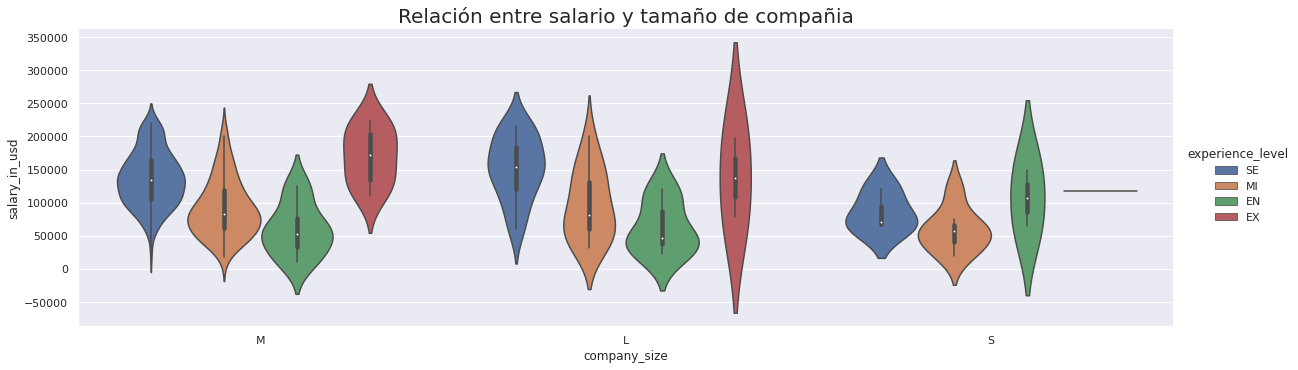

In [ ]:
#Se genera grafico de violin donde se observa distribucion salarial de los diferentes experience_level y se compara segun tamano de la empresa
#Se observa como la mediana salarial de experience_level es relativamente igual segun tamano de la compania,
#por otro lado que EX de las empresas pequenas tienen muchas dispersion salarial en los valeres de la muestra
sns.set(rc={'figure.figsize':(20,15)})
sns.catplot(data=salarios,kind='violin',x='company_size',y='salary_in_usd', hue='experience_level', aspect=50/15)
plt.title('Relación entre salario y tamaño de compañia', fontsize = 20, fontweight = 30)
plt.show()

**Relación entre nivel salarial y la modalidad de trabajo de los empleados**

Se analizó el salario promedio en dólares respecto de la modalidad de trabajo que tienen los empleados: 0: presencial, 100: remoto, 50: hibrido entre el primero y el segundo.

Se puede observar que la brecha más amplia se da entre la modalidad hibrida y 100% remota. Sin embargo, hay que considerar que solo se cuenta con 3% de empleados en la base de datos, que estén bajo esta modalidad, y a su vez trabajan en regiones donde el nivel de salario es más bajo que otras regiones con modalidad hibrida.


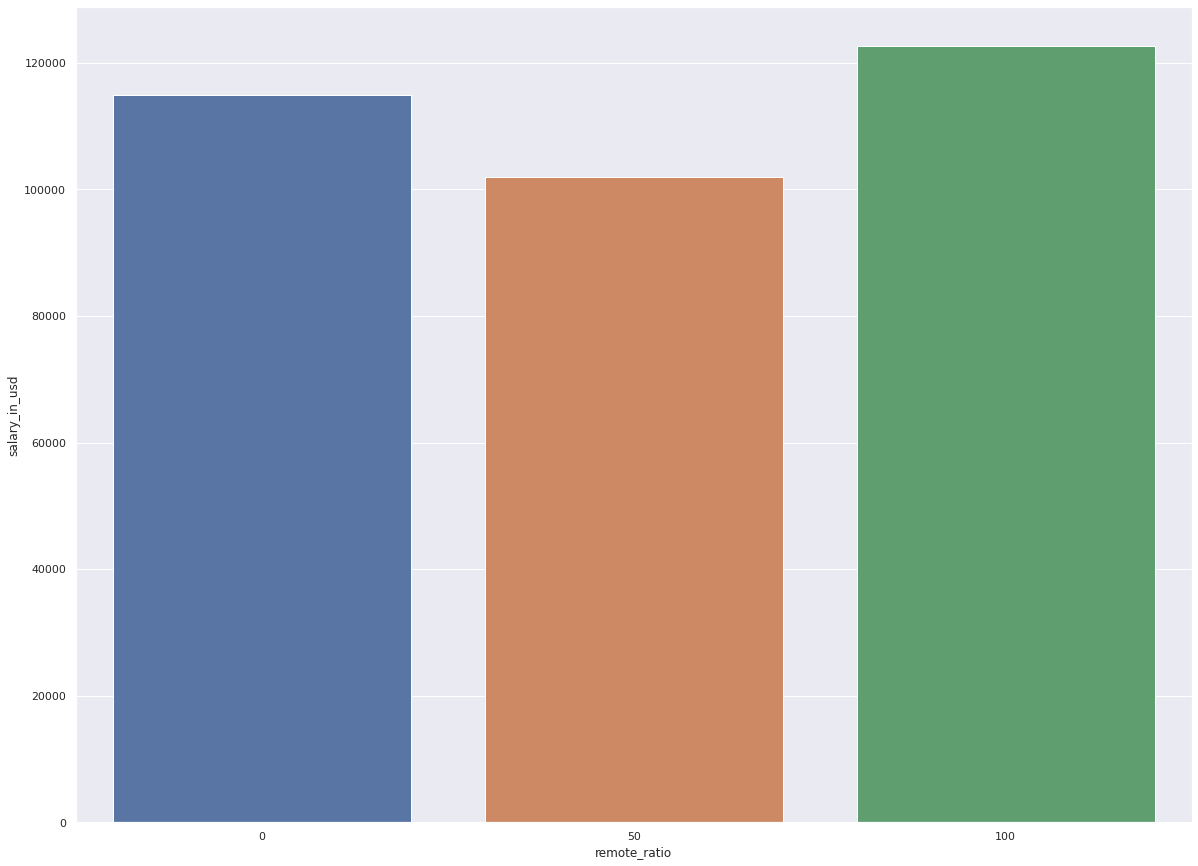

In [ ]:
#Se compara en gráfico de barras el promedio salarial según el tipo de trabajo del empleado (presencial, hibrido o remoto)
title = salarios[["remote_ratio", "salary_in_usd"]].groupby(['remote_ratio'], as_index=False).mean().sort_values(by='salary_in_usd', ascending=False)

plt.figure()

sns.barplot(x='remote_ratio', y='salary_in_usd', data=title)
plt.savefig('barras remoto.png')
plt.show()

##Limpieza de Base de Datos para Modelado

Objetivo: Predecir si el postulante para determinado puesto, con calificaciones específicas, va a ajustar su expectativa salarial al presupuesto disponible por la empresa que está realizando la búsqueda. 



In [ ]:
salarios.head()

,experience_level,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Flag Manager,Flag Director,Flag Lead,Flag Engineer,...,Flag Software Engineer,Flag Infrastructure Engineer,Flag Applied Scientist,Flag Developer,Flag Head,Flag Scientist,Flag Analyst,New Job Title,Employee_region,Company_region
0,SE,135000,US,100,US,M,0,0,0,1,...,0,0,0,0,0,0,0,Data Science,North_America,North_America
1,SE,155000,US,100,US,M,0,0,0,0,...,0,0,0,0,0,0,1,Data Analytics,North_America,North_America
2,SE,120600,US,100,US,M,0,0,0,0,...,0,0,0,0,0,0,1,Data Analytics,North_America,North_America
3,MI,130000,US,0,US,M,0,0,0,0,...,0,0,0,0,0,1,0,Data Science,North_America,North_America
4,MI,90000,US,0,US,M,0,0,0,0,...,0,0,0,0,0,1,0,Data Science,North_America,North_America


In [ ]:
# Se realiza limpieza de las columnas que no se van a utilizar en el modelado
salarios = salarios.drop(['employee_residence','company_location'], axis = 1)

In [ ]:
#Se convierte a valores ordinales para posterior modelado 
salarios['experience_level'] = salarios['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
salarios['remote_ratio'] = salarios['remote_ratio'].replace({100: 3, 50: 2, 0: 1})
salarios['company_size'] = salarios['company_size'].replace({'S':1 ,'M': 2, 'L': 3})
salarios.head()
salarios.shape

(304, 19)

Se considera como restricción por parte de la empresa un piso salarial máximo por cargo o puesto laboral, que será el filtro contra el que se medirán las expectativas salariales de los postulantes.

In [ ]:
job_title_median = salarios.groupby(["New Job Title"],as_index=False).median('salary_in_usd').drop(salarios.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]],axis='columns').round(0)
job_title_median

,New Job Title,salary_in_usd
0,AI Science,160000.0
1,Computer Vision Engineer,125000.0
2,Data Analytics,106260.0
3,Data Architect,192400.0
4,Data Science,132320.0
5,ETL Developer,54957.0
6,Machine Learning,105229.0
7,NLP,37236.0
8,Research Scientist,106714.0


In [ ]:
#Se genera vectores con salarios maximos aceptables para obtener la columna target 
job_title_median_array = job_title_median.to_numpy()
job_title_median_array

array([['AI Science', 160000.0],
       ['Computer Vision Engineer', 125000.0],
       ['Data Analytics', 106260.0],
       ['Data Architect', 192400.0],
       ['Data Science', 132320.0],
       ['ETL Developer', 54957.0],
       ['Machine Learning', 105229.0],
       ['NLP', 37236.0],
       ['Research Scientist', 106714.0]], dtype=object)

In [ ]:
#Se genera diccionario para incluia a dataset
dict_job = dict(job_title_median.values)
dict_job

{'AI Science': 160000.0,
 'Computer Vision Engineer': 125000.0,
 'Data Analytics': 106260.0,
 'Data Architect': 192400.0,
 'Data Science': 132320.0,
 'ETL Developer': 54957.0,
 'Machine Learning': 105229.0,
 'NLP': 37236.0,
 'Research Scientist': 106714.0}

In [ ]:
salarios["New Job Title median"] = salarios["New Job Title"]

In [ ]:
#Se incluye al dataset la columna New Job Title median
salarios = salarios.replace({"New Job Title median":dict_job}, regex=True)
salarios.head()

,experience_level,salary_in_usd,remote_ratio,company_size,Flag Manager,Flag Director,Flag Lead,Flag Engineer,Flag Principal,Flag Software Engineer,Flag Infrastructure Engineer,Flag Applied Scientist,Flag Developer,Flag Head,Flag Scientist,Flag Analyst,New Job Title,Employee_region,Company_region,New Job Title median
0,3,135000,3,2,0,0,0,1,0,0,0,0,0,0,0,0,Data Science,North_America,North_America,132320.0
1,3,155000,3,2,0,0,0,0,0,0,0,0,0,0,0,1,Data Analytics,North_America,North_America,106260.0
2,3,120600,3,2,0,0,0,0,0,0,0,0,0,0,0,1,Data Analytics,North_America,North_America,106260.0
3,2,130000,1,2,0,0,0,0,0,0,0,0,0,0,1,0,Data Science,North_America,North_America,132320.0
4,2,90000,1,2,0,0,0,0,0,0,0,0,0,0,1,0,Data Science,North_America,North_America,132320.0


In [ ]:
#Se calcula la diferencia entre los salarios en dolares y los salarios maximos aceptables
salarios["New Job Title median"] = salarios['salary_in_usd'] - salarios["New Job Title median"]
salarios.head()

,experience_level,salary_in_usd,remote_ratio,company_size,Flag Manager,Flag Director,Flag Lead,Flag Engineer,Flag Principal,Flag Software Engineer,Flag Infrastructure Engineer,Flag Applied Scientist,Flag Developer,Flag Head,Flag Scientist,Flag Analyst,New Job Title,Employee_region,Company_region,New Job Title median
0,3,135000,3,2,0,0,0,1,0,0,0,0,0,0,0,0,Data Science,North_America,North_America,2680.0
1,3,155000,3,2,0,0,0,0,0,0,0,0,0,0,0,1,Data Analytics,North_America,North_America,48740.0
2,3,120600,3,2,0,0,0,0,0,0,0,0,0,0,0,1,Data Analytics,North_America,North_America,14340.0
3,2,130000,1,2,0,0,0,0,0,0,0,0,0,0,1,0,Data Science,North_America,North_America,-2320.0
4,2,90000,1,2,0,0,0,0,0,0,0,0,0,0,1,0,Data Science,North_America,North_America,-42320.0


In [ ]:
#Se genera una columna con valores 0 cuando supera el salario maximo aceptable, y 1 cuando no supera el salario maximo aceptable
condiciones = [(salarios["New Job Title median"] > 0),
               (salarios["New Job Title median"] <= 0),
               ]
elecciones = np.array((0, 1), dtype="int64")
salarios["New Job Title median"] = np.select(condiciones, elecciones)

In [ ]:
salarios.head()

,experience_level,salary_in_usd,remote_ratio,company_size,Flag Manager,Flag Director,Flag Lead,Flag Engineer,Flag Principal,Flag Software Engineer,Flag Infrastructure Engineer,Flag Applied Scientist,Flag Developer,Flag Head,Flag Scientist,Flag Analyst,New Job Title,Employee_region,Company_region,New Job Title median
0,3,135000,3,2,0,0,0,1,0,0,0,0,0,0,0,0,Data Science,North_America,North_America,0
1,3,155000,3,2,0,0,0,0,0,0,0,0,0,0,0,1,Data Analytics,North_America,North_America,0
2,3,120600,3,2,0,0,0,0,0,0,0,0,0,0,0,1,Data Analytics,North_America,North_America,0
3,2,130000,1,2,0,0,0,0,0,0,0,0,0,0,1,0,Data Science,North_America,North_America,1
4,2,90000,1,2,0,0,0,0,0,0,0,0,0,0,1,0,Data Science,North_America,North_America,1


In [ ]:
#Se elimina la columna salary_in_usd
salarios = salarios.drop(['salary_in_usd'], axis='columns')
salarios.head()

,experience_level,remote_ratio,company_size,Flag Manager,Flag Director,Flag Lead,Flag Engineer,Flag Principal,Flag Software Engineer,Flag Infrastructure Engineer,Flag Applied Scientist,Flag Developer,Flag Head,Flag Scientist,Flag Analyst,New Job Title,Employee_region,Company_region,New Job Title median
0,3,3,2,0,0,0,1,0,0,0,0,0,0,0,0,Data Science,North_America,North_America,0
1,3,3,2,0,0,0,0,0,0,0,0,0,0,0,1,Data Analytics,North_America,North_America,0
2,3,3,2,0,0,0,0,0,0,0,0,0,0,0,1,Data Analytics,North_America,North_America,0
3,2,1,2,0,0,0,0,0,0,0,0,0,0,1,0,Data Science,North_America,North_America,1
4,2,1,2,0,0,0,0,0,0,0,0,0,0,1,0,Data Science,North_America,North_America,1


In [ ]:
#Se genera columnas dummies
salarios = pd.get_dummies(salarios)

In [ ]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 313
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   experience_level                        304 non-null    int64
 1   remote_ratio                            304 non-null    int64
 2   company_size                            304 non-null    int64
 3   Flag Manager                            304 non-null    int64
 4   Flag Director                           304 non-null    int64
 5   Flag Lead                               304 non-null    int64
 6   Flag Engineer                           304 non-null    int64
 7   Flag Principal                          304 non-null    int64
 8   Flag Software Engineer                  304 non-null    int64
 9   Flag Infrastructure Engineer            304 non-null    int64
 10  Flag Applied Scientist                  304 non-null    int64
 11  Flag Developer     

In [ ]:
#Se coloca variables target en la ultima columna
salarios['median_job_titles'] = salarios['New Job Title median']
salarios = salarios.drop(['New Job Title median'], axis='columns')
salarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 313
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   experience_level                        304 non-null    int64
 1   remote_ratio                            304 non-null    int64
 2   company_size                            304 non-null    int64
 3   Flag Manager                            304 non-null    int64
 4   Flag Director                           304 non-null    int64
 5   Flag Lead                               304 non-null    int64
 6   Flag Engineer                           304 non-null    int64
 7   Flag Principal                          304 non-null    int64
 8   Flag Software Engineer                  304 non-null    int64
 9   Flag Infrastructure Engineer            304 non-null    int64
 10  Flag Applied Scientist                  304 non-null    int64
 11  Flag Developer     

In [ ]:
salarios.groupby('median_job_titles').count()

,experience_level,remote_ratio,company_size,Flag Manager,Flag Director,Flag Lead,Flag Engineer,Flag Principal,Flag Software Engineer,Flag Infrastructure Engineer,...,Employee_region_Latam,Employee_region_North_America,Employee_region_Oceania,Employee_region_Western_Europe,Company_region_Asia,Company_region_Central_Europe,Company_region_Eastern_Europe,Company_region_North_America,Company_region_Oceania,Company_region_Western_Europe
median_job_titles,,,,,,,,,,,,,,,,,,,,,
0,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147
1,157,157,157,157,157,157,157,157,157,157,...,157,157,157,157,157,157,157,157,157,157


In [ ]:
# split sets de entrenamiento y de testeo
train, test = train_test_split(salarios, test_size=0.3, random_state=42)

#Modelos

Para poder lograr el objetivo propuesto se desarrollaron cinco modelos: Regresión Logística, SCV, Árbol de decisión, Random Forest y MLP Classifier

In [ ]:
#Genero las variables que seran columnas en la tabla de resultados de modelos y metricas
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict
cv = KFold(5, shuffle=True, random_state = 1)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
                             classification_report, confusion_matrix)
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
AUC = []

In [ ]:
#Se define X y se normaliza, se define Y
x = train[salarios.columns[:-1]]
y = train[salarios.columns[-1]]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)


In [ ]:

from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy = 'most_frequent',random_state = 1)
Model.append("Dummy")
Accuracy.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [ ]:
#Se entrena y selecciona mejor modelo, score e hiperparametro
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
param_grid = {'C': [0.1, 0.4, 0.7, 1, 4, 7, 10]}
grid1 = GridSearchCV(lr, param_grid, cv=cv).fit(x_scaled, y)
print("Grid Logistic Regression: ", grid1.best_score_, grid1.best_params_)

Grid Logistic Regression:  0.7262458471760798 {'C': 4}


In [ ]:
#Se agrega a tabla resultados el mejor modelo y metricas obtenidas 
from sklearn.linear_model import LogisticRegression
clf = grid1.best_estimator_
Model.append("Logistic Regression")
Accuracy.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [ ]:
#Mejor modelo score e hiperparametro
from sklearn.svm import SVC
svc = SVC()
param_grid = {'C': [0.1, 0.4, 0.7, 1, 4, 7, 10],
              'kernel': ['linear', 'rbf']}
grid1 = GridSearchCV(svc, param_grid, cv=cv).fit(x_scaled, y)
print("Grid SVC: ", grid1.best_score_, grid1.best_params_)

Grid SVC:  0.7264673311184939 {'C': 1, 'kernel': 'linear'}


In [ ]:
#Se agrega a tabla resultados el mejor modelo y metricas obtenidas
from sklearn.svm import SVC
clf = grid1.best_estimator_
Model.append("SVC")
Accuracy.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [ ]:
#Mejor modelo score e hiperparametro
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param_grid = {'max_depth': [10, 40, 70, 100, 400, 700, None],
              'criterion': ['gini','entropy']}
grid1 = GridSearchCV(dtc, param_grid, cv=cv).fit(x_scaled, y)
print("Grid DTC: ", grid1.best_score_, grid1.best_params_)

Grid DTC:  0.7071982281284607 {'criterion': 'entropy', 'max_depth': 40}


In [ ]:
#Se agrega a tabla resultados el mejor modelo y metricas obtenidas
from sklearn.tree import DecisionTreeClassifier
clf = grid1.best_estimator_
Model.append("Decision Tree Classifier")
Accuracy.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [ ]:
#Se realiza una primera busqueda del numero optimo de estimadores
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators': [10,40,70,100,400,700,1000]}
grid1 = GridSearchCV(rfc, param_grid, cv=cv).fit(x_scaled, y)
print("Grid RFC: ", grid1.best_score_, grid1.best_params_)

Grid RFC:  0.7212624584717607 {'n_estimators': 100}


In [ ]:
#Se realiza busqueda del numero optimo de estimadores
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators': [55,60,65,70,75,80,85]}
grid2 = GridSearchCV(rfc, param_grid, cv=cv).fit(x_scaled, y)
print("Grid RFC: ", grid2.best_score_, grid2.best_params_)

Grid RFC:  0.7213732004429678 {'n_estimators': 55}


In [ ]:
#Mejor modelo score e hiperparametro
from sklearn.ensemble import RandomForestClassifier
rfc = grid2.best_estimator_
param_grid = {'criterion': ['gini','entropy'],
              'max_depth': [5, 10, 15, 20, 25, 30, None]}
grid3 = GridSearchCV(rfc, param_grid, cv=cv).fit(x_scaled, y)
print("Grid RFC: ", grid3.best_score_, grid3.best_params_)

Grid RFC:  0.7213732004429678 {'criterion': 'gini', 'max_depth': 20}


In [ ]:
#Se agrega a tabla resultados el mejor modelo y metricas obtenidas
from sklearn.ensemble import RandomForestClassifier
clf = grid3.best_estimator_
Model.append("Random Forest Classifier")
Accuracy.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [ ]:
#Mejor modelo score e hiperparametro
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant','adaptive']}
grid1 = GridSearchCV(mlp, param_grid, cv=cv).fit(x_scaled, y)
print("Grid MLP: ", grid1.best_score_, grid1.best_params_)

Grid MLP:  0.7356589147286822 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}


In [ ]:
#Se agrega a tabla resultados el mejor modelo y metricas obtenidas
from sklearn.neural_network import MLPClassifier
clf = grid1.best_estimator_
Model.append("MLP Classifier")
Accuracy.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='accuracy').mean())
Precision.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='precision').mean())
Recall.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='recall').mean())
F1.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='f1').mean())
AUC.append(cross_val_score(clf, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [ ]:
#Se compila la tabla con los diferentes (mejores) modelos obtenidos y se comparan segun diferentes metricas
evaluation = pd.DataFrame({'Model': Model, 
                           'Accuracy': Accuracy, 
                           'Precision': Precision, 
                           'Recall': Recall,
                           'F1 Score': F1, 
                           'AUC': AUC})
evaluation

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Dummy,0.457364,0.395460,0.800000,0.529067,0.500000
1,Logistic Regression,0.726246,0.880496,0.589625,0.693655,0.799209
2,SVC,0.726467,0.860409,0.590102,0.694741,0.808162
3,Decision Tree Classifier,0.702326,0.831493,0.578340,0.672698,0.740207
4,Random Forest Classifier,0.721373,0.821165,0.629363,0.704397,0.782434
5,MLP Classifier,0.735659,0.868732,0.606955,0.709314,0.795676


Se puede observar que el modelo “MLP Classifier” obtuvo las mejores métricas de accuracy, precision y F1 Score. 
Como segunda alternativa, el modelo SVC cuenta con las siguientes mejores métricas

##Modelo en TEST

Para continuar con la implementación, se decide llevar a la siguiente fase de testeo al modelo MLP Classifier ya que tiene una métrica de accuracy más alto, de 0.74. 

In [ ]:
#Tamano de la particion para testeo
test.shape

(92, 38)

In [ ]:
test.head(2)

,experience_level,remote_ratio,company_size,Flag Manager,Flag Director,Flag Lead,Flag Engineer,Flag Principal,Flag Software Engineer,Flag Infrastructure Engineer,...,Employee_region_North_America,Employee_region_Oceania,Employee_region_Western_Europe,Company_region_Asia,Company_region_Central_Europe,Company_region_Eastern_Europe,Company_region_North_America,Company_region_Oceania,Company_region_Western_Europe,median_job_titles
184,2,1,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
158,3,3,3,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
#Se dividen los datos para entrenamiento y test
x_test = test[salarios.columns[:-1]]
y_test = test[salarios.columns[-1]]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_test)
x_scaled2 = scaler.transform(x_test)

In [ ]:
#Se entrena segun modelo elegido 
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled2, y_test, test_size=0.2, random_state=24)

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
clf.score(X_train, Y_train)

0.821917808219178

In [ ]:
# Se calculan las diferentes metricas para observar su rendimiento
y_train_pred = clf.predict(X_test)
a = accuracy_score(Y_test, y_train_pred)
p = precision_score(Y_test, y_train_pred)
r = recall_score(Y_test, y_train_pred)
f1 = f1_score(Y_test, y_train_pred)
roc = roc_auc_score(Y_test, y_train_pred)
print('%accuracy_score:',a,'%precision_score:',p,'%recall_score:',r,'%f1_score:',f1,'%roc_auc_score:',roc)

%accuracy_score: 0.7368421052631579 %precision_score: 0.8 %recall_score: 0.5 %f1_score: 0.6153846153846154 %roc_auc_score: 0.7045454545454545


Para poder realizar un test sobre el modelo elegido se segmentó la base de datos, previo al entrenamiento, guardando al azar 30% de los datos de la muestra.
Dicha muestra fue testeada en el modelo elegido MLP Classifier, arrojando las siguientes métricas:

Accuracy Score: 73.7%
Precision Score: 80%
Recall Score: 50%
F11 Score: 61.5%
Roc Score: 70.4%

Como se puede observar, el accuracy es similar al obtenido en el entrenamiento de los modelos. A su vez, las demás métricas muestran una mejora porcentual de sus resultados previos.


# Conclusión

* Para poder llevar a cabo el entrenamiento y selección de modelos se tuvo que realizar un gran trabajo de normalización de datos, esto se debe principalmente a la falta de casos representativos para cada variable, en la muestra obtenida. 

* Dentro del data wrangling se crearon nuevas variables que permitan agrupar diferentes características de la muestra, para poder utilizarlas en el modelado. A su vez, se analizó el peso de las variables y se quitaron aquellas que no aportan valor y no se encuentran relacionadas.

* Es importante realizar los pasos de limpieza de datos que se realizaron en la futura ingesta de datos que se haga en el modelo.

* Se sugiere realizar una nueva evaluación del modelo y sus variables al menos cada tres meses para asegurarse que no haya ocurrido algún cambio en la industria, variables u objetivos.
